In [1]:
import gdown

# Specify the folder ID
folder_id = '132Svb8NETigiTtjHiMWh_V0ffRKeX60-'

# Use gdown to download the folder
# gdown.download_folder(id=folder_id, quiet=False)


In [2]:
import pandas as pd

# Load CSV files into pandas DataFrames
train_df = pd.read_csv('../../data/Seattle Mariners 2025 Analytics Internship/data-train.csv')
test_df = pd.read_csv('../../data/Seattle Mariners 2025 Analytics Internship/data-test.csv')
data_dict_df = pd.read_csv('../../data/Seattle Mariners 2025 Analytics Internship/data-dictionary.csv')

# Display the first few rows of each DataFrame to understand the structure
print("Training Data Sample:")
print(train_df.columns)
print(train_df.head())
print(train_df.columns)

print("\nTest Data Sample:")
print(test_df.columns)
print(test_df.head())

# Display the data dictionary for reference
print("\nData Dictionary:")
print(data_dict_df)

missing_percentage = train_df['hit_spin_rate'].isnull().mean() * 100
print(f"Percentage of missing hit_spin_rate values: {missing_percentage:.2f}%")


# Check for missing values in the training data before handling
print("\nMissing Values in Training Data (Before Handling):")
missing_values_before = test_df.isnull().sum()
print(missing_values_before)





Training Data Sample:
Index(['pitch_id', 'gamedate', 'temperature', 'level', 'bat_side',
       'pitch_side', 'inning', 'top', 'pre_balls', 'pre_strikes', 'pre_outs',
       'venue_id', 'lf_id', 'cf_id', 'rf_id', 'exit_speed', 'hit_spin_rate',
       'vert_exit_angle', 'horz_exit_angle', 'first_fielder', 'is_airout'],
      dtype='object')
                               pitch_id    gamedate  temperature level  \
0  baf33cb0-ead5-11ed-b8b5-83f2429f6963  2023-05-04           72     A   
1  07289236-0606-0033-000c-f08cd117d70a  2023-05-12           85     A   
2  07269936-0326-0043-000c-f08cd117d70a  2023-07-21           88     B   
3  07243576-0196-0013-000c-f08cd117d70a  2023-08-02           82     A   
4  e71caf30-0275-11ee-a9a7-7d92def17025  2023-06-03           73     A   

  bat_side pitch_side  inning  top  pre_balls  pre_strikes  ...  venue_id  \
0        R          R       2    1          3            1  ...    679072   
1        R          R       8    0          0            2 

In [3]:
# Analyze unique values and data types for each feature in the dataset
# Check unique values for the 'pre_balls' feature and other features

# Get a summary of unique values for each column in the training dataset
train_summary = train_df.nunique()
test_summary = test_df.nunique()

# Get the data types of columns in the training dataset
data_types = train_df.dtypes

# Display the summary and data types of each column
print("\nTraining Data Summary of Unique Values:")
print(train_summary)
print("\nTest Data Summary of Unique Values:")
print(test_summary)

print("\nData Types of Columns in Training Data:")
print(data_types)

# Analyze 'pre_balls', 'pre_strikes', and other similar count-based features
print("\nUnique values in 'pre_balls':")
print(train_df['pre_balls'].value_counts())

print("\nUnique values in 'pre_strikes':")
print(train_df['pre_strikes'].value_counts())

print("\nUnique values in 'pre_outs':")
print(train_df['pre_outs'].value_counts())

# Analyze categorical features such as 'bat_side' and 'pitch_side'
print("\nUnique values in 'bat_side':")
print(train_df['bat_side'].value_counts())

print("\nUnique values in 'pitch_side':")
print(train_df['pitch_side'].value_counts())

# Analyze other relevant features like 'hit_spin_rate' and 'exit_speed' to check for missing values and their distribution
print("\nMissing values and distribution in 'hit_spin_rate':")
print(train_df['hit_spin_rate'].describe())
print(f"Missing values in 'hit_spin_rate': {train_df['hit_spin_rate'].isnull().sum()}")

print("\nDistribution of 'exit_speed':")
print(train_df['exit_speed'].describe())

# Analyze 'is_airout', the target variable, for class distribution
print("\nClass distribution in 'is_airout':")
print(train_df['is_airout'].value_counts(normalize=True))

# Display the unique values and their count in the test dataset for comparison
print("\nUnique values in the test dataset for 'pre_balls':")
print(test_df['pre_balls'].value_counts())

print("\nUnique values in the test dataset for 'pre_strikes':")
print(test_df['pre_strikes'].value_counts())

print("\nUnique values in the test dataset for 'pre_outs':")
print(test_df['pre_outs'].value_counts())





Training Data Summary of Unique Values:
pitch_id           91553
gamedate             142
temperature           71
level                  2
bat_side               2
pitch_side             2
inning                14
top                    2
pre_balls              5
pre_strikes            3
pre_outs               3
venue_id              60
lf_id                518
cf_id                330
rf_id                448
exit_speed         86092
hit_spin_rate      87709
vert_exit_angle    89055
horz_exit_angle    90722
first_fielder        588
is_airout              2
dtype: int64

Test Data Summary of Unique Values:
pitch_id           22889
gamedate             142
temperature           71
level                  2
bat_side               2
pitch_side             2
inning                14
top                    2
pre_balls              5
pre_strikes            3
pre_outs               3
venue_id              60
exit_speed         22523
hit_spin_rate      22417
vert_exit_angle    22743
horz_exit

In [4]:
# Identify features in training and test datasets
train_features = set(train_df.columns)
test_features = set(test_df.columns)

# Features that are common between train and test datasets
common_features = list(train_features.intersection(test_features))

# Identify features to drop from the training set
features_to_drop = list(train_features.difference(test_features))
print(f"Features to drop from training set: {features_to_drop}")

# Drop unnecessary columns from training set
train_df = train_df.drop(columns=features_to_drop)

# Ensure target variable is not in test set
target_variable = 'is_airout'
if target_variable in test_df.columns:
    test_df = test_df.drop(columns=[target_variable])

# Retain only common features in both datasets
train_df = train_df[common_features]
test_df = test_df[common_features]

# Check if training and test datasets have the same feature columns
print(f"Training columns after transformation: {train_df.columns}")
print(f"Test columns after transformation: {test_df.columns}")


# List of features in the dataset after dropping unnecessary columns
all_features = [
    'pre_strikes', 'gamedate', 'exit_speed', 'pre_outs', 'inning',
    'pitch_side', 'bat_side', 'top', 'venue_id', 'vert_exit_angle',
    'pre_balls', 'horz_exit_angle', 'hit_spin_rate', 'pitch_id',
    'temperature', 'level'
]

# Categorize features for transformation
categorical_features = ['pre_balls', 'pre_strikes', 'pitch_side', 'bat_side', 'top', 'venue_id', 
                        'level', 'inning', 'temperature']
numerical_features = [
     'exit_speed', 'vert_exit_angle',
     'horz_exit_angle', 'hit_spin_rate'
]
date_features = ['gamedate']
identifier_features = ['pitch_id']  # Will be dropped since it's an identifier

# Display categorized features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)
print("Date Features:", date_features)
print("Identifier Features:", identifier_features)



Features to drop from training set: ['first_fielder', 'is_airout', 'rf_id', 'cf_id', 'lf_id']
Training columns after transformation: Index(['hit_spin_rate', 'top', 'venue_id', 'pitch_id', 'pitch_side',
       'pre_strikes', 'gamedate', 'temperature', 'horz_exit_angle', 'level',
       'pre_balls', 'pre_outs', 'inning', 'exit_speed', 'vert_exit_angle',
       'bat_side'],
      dtype='object')
Test columns after transformation: Index(['hit_spin_rate', 'top', 'venue_id', 'pitch_id', 'pitch_side',
       'pre_strikes', 'gamedate', 'temperature', 'horz_exit_angle', 'level',
       'pre_balls', 'pre_outs', 'inning', 'exit_speed', 'vert_exit_angle',
       'bat_side'],
      dtype='object')
Categorical Features: ['pre_balls', 'pre_strikes', 'pitch_side', 'bat_side', 'top', 'venue_id', 'level', 'inning', 'temperature']
Numerical Features: ['exit_speed', 'vert_exit_angle', 'horz_exit_angle', 'hit_spin_rate']
Date Features: ['gamedate']
Identifier Features: ['pitch_id']


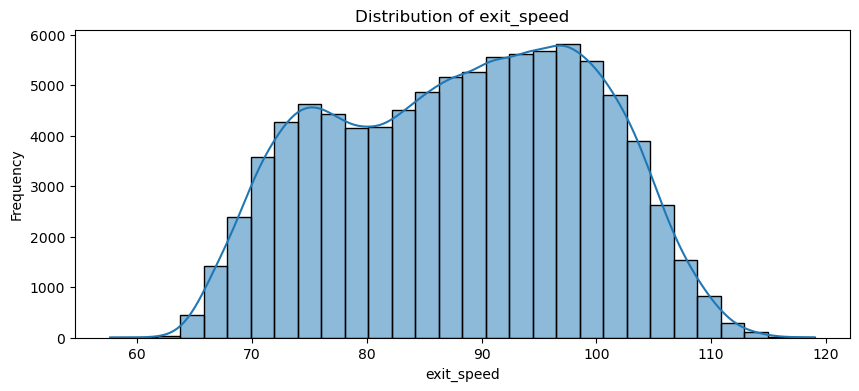

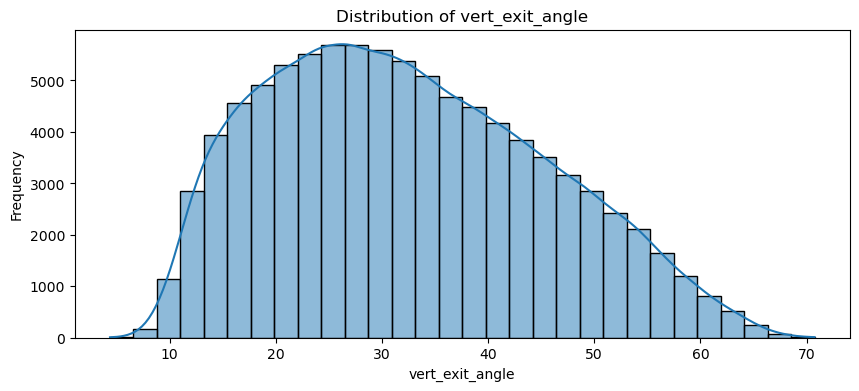

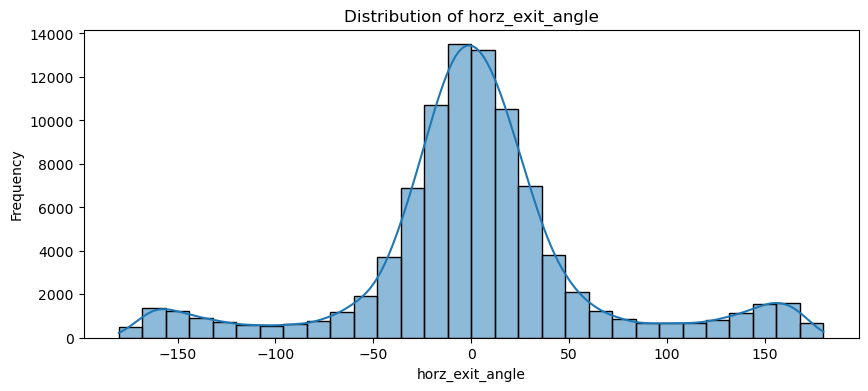

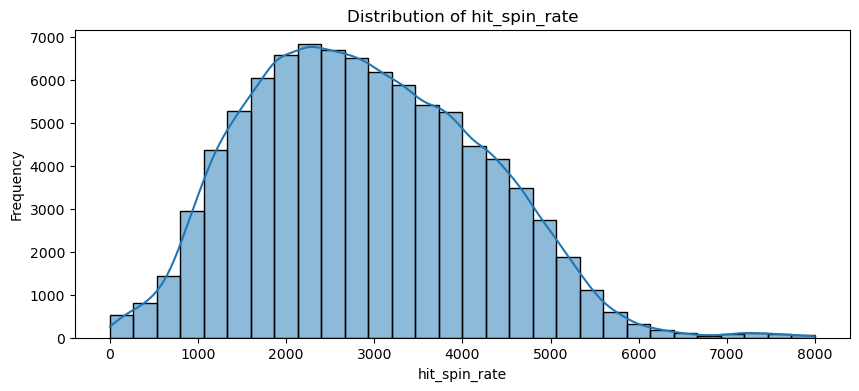

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Inspect numerical feature distributions
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(train_df[feature].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


In [6]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest Classifier')
plt.show()

# Display top 10 most important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))


NameError: name 'RandomForestClassifier' is not defined

Training Data Sample:
                               pitch_id    gamedate  temperature level  \
0  baf33cb0-ead5-11ed-b8b5-83f2429f6963  2023-05-04           72     A   
1  07289236-0606-0033-000c-f08cd117d70a  2023-05-12           85     A   
2  07269936-0326-0043-000c-f08cd117d70a  2023-07-21           88     B   
3  07243576-0196-0013-000c-f08cd117d70a  2023-08-02           82     A   
4  e71caf30-0275-11ee-a9a7-7d92def17025  2023-06-03           73     A   

  bat_side pitch_side  inning  top  pre_balls  pre_strikes  ...  venue_id  \
0        R          R       2    1          3            1  ...    679072   
1        R          R       8    0          0            2  ...    679384   
2        L          R       4    0          1            2  ...    679417   
3        R          L       3    1          0            0  ...    679031   
4        R          L       1    0          2            1  ...    672765   

    lf_id  cf_id  rf_id  exit_speed  hit_spin_rate  vert_exit_angle  \

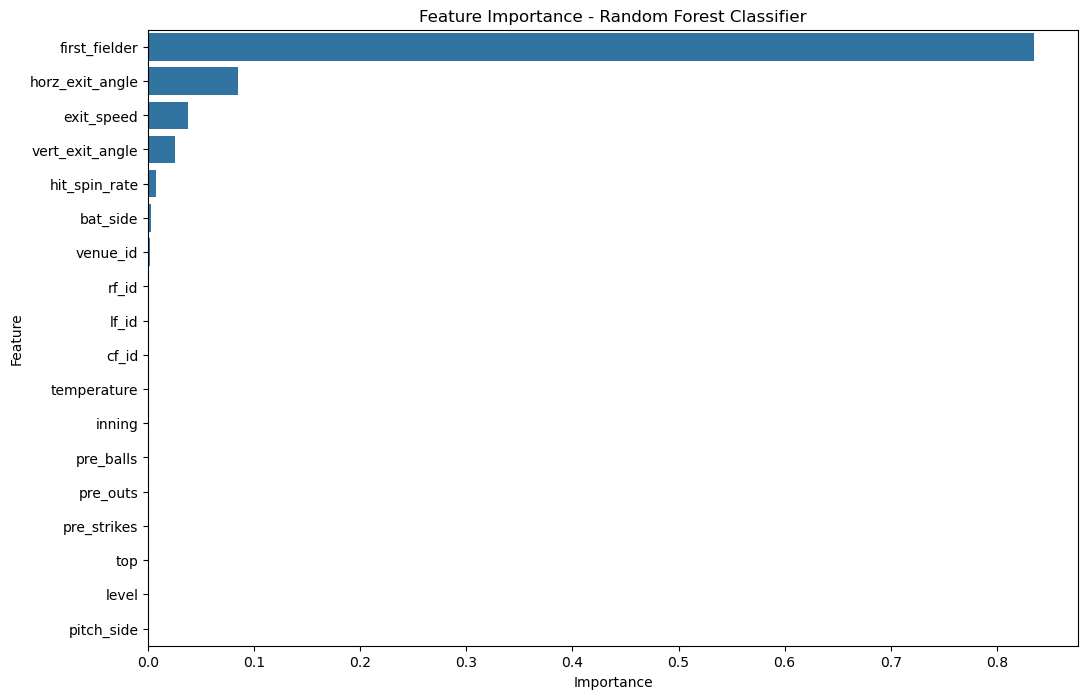

Top 10 Important Features:
            Feature  Importance
17    first_fielder    0.834942
16  horz_exit_angle    0.085075
13       exit_speed    0.037376
15  vert_exit_angle    0.025040
14    hit_spin_rate    0.007752
2          bat_side    0.002298
9          venue_id    0.001595
12            rf_id    0.001075
10            lf_id    0.001008
11            cf_id    0.000964


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- p_airout
Feature names seen at fit time, yet now missing:
- cf_id
- first_fielder
- lf_id
- rf_id


In [1]:
# %%
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score

# %%
# Load CSV files into pandas DataFrames
train_df = pd.read_csv('../../data/Seattle Mariners 2025 Analytics Internship/data-train.csv')
test_df = pd.read_csv('../../data/Seattle Mariners 2025 Analytics Internship/data-test.csv')
data_dict_df = pd.read_csv('../../data/Seattle Mariners 2025 Analytics Internship/data-dictionary.csv')

# Display the first few rows of each DataFrame to understand the structure
print("Training Data Sample:")
print(train_df.head())

print("\nTest Data Sample:")
print(test_df.head())

print("\nData Dictionary:")
print(data_dict_df)

# %%
# Analyzing missing values in the dataset
print("\nMissing Values in Training Data:")
missing_values_before = train_df.isnull().sum()
print(missing_values_before)

# Check the percentage of missing 'hit_spin_rate' values
missing_percentage = train_df['hit_spin_rate'].isnull().mean() * 100
print(f"Percentage of missing 'hit_spin_rate' values: {missing_percentage:.2f}%")

# Filling missing values with mean for numerical features and mode for categorical features
imputer = SimpleImputer(strategy='mean')
train_df['hit_spin_rate'] = imputer.fit_transform(train_df[['hit_spin_rate']])
test_df['hit_spin_rate'] = imputer.transform(test_df[['hit_spin_rate']])

# %%
# Encoding categorical variables such as 'bat_side' and 'pitch_side'
categorical_cols = ['bat_side', 'pitch_side', 'top', 'venue_id', 'level']
for col in categorical_cols:
    encoder = LabelEncoder()
    train_df[col] = encoder.fit_transform(train_df[col].astype(str))
    test_df[col] = encoder.transform(test_df[col].astype(str))

# Display encoded values for verification
print("Encoded Categorical Features Sample (Training Data):")
print(train_df[categorical_cols].head())

# %%
# Feature engineering: Dropping irrelevant or unnecessary columns
columns_to_drop = ['pitch_id', 'gamedate']  # Dropping columns that won't be used in modeling


In [ ]:
train_df = train_df.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)

# Define target variable and separate features
target_variable = 'is_airout'
X_train = train_df.drop(columns=[target_variable])
y_train = train_df[target_variable]
X_test = test_df.copy()  # No target column in test data

# Display training data after preprocessing
print("Training Data after Preprocessing:")
print(X_train.head())
print("Target Variable Distribution:")
print(y_train.value_counts(normalize=True))

# %%
# Train-test split for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Feature scaling for numerical features
scaler = StandardScaler()
numerical_features = ['exit_speed', 'vert_exit_angle', 'horz_exit_angle', 'hit_spin_rate']
X_train_split[numerical_features] = scaler.fit_transform(X_train_split[numerical_features])
X_val_split[numerical_features] = scaler.transform(X_val_split[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# %%
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)

# Predictions and evaluation on validation set
y_val_pred_proba = rf_model.predict_proba(X_val_split)[:, 1]
log_loss_val = log_loss(y_val_split, y_val_pred_proba)
print(f"Validation Log Loss: {log_loss_val:.4f}")

# %%
# Feature importance analysis
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X_train_split.columns, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest Classifier')
plt.show()

# Display top 10 most important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# %%
# Predictions on the test set
y_test_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Create a submission file
submission_df = test_df.copy()
submission_df['p_airout'] = y_test_pred_proba

# Save the predictions to a CSV file
submission_file = 'submission_test_predictions.csv'
submission_df.to_csv(submission_file, index=False)
print(f"Test predictions saved to {submission_file}")

